In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import ast

In [2]:
lc_labels = {
    str([255, 255, 255, 255]):"Clouds",
    str([210,0,0,255]):"Artificial surfaces and constructions",
    str([253,211,39,255]):"Cultivated areas",
    str([176,91,16,255]):"Vineyards",
    str([35,152,0,255]):"Broadleaf tree cover",
    str([8,98,0,255]):"Coniferous tree cover",
    str([249,150,39,255]):"Herbaceous vegetation",
    str([141,139,0,255]):"Moors and Heathland",
    str([95,53,6,255]):"Sclerophyllous vegetation",
    str([149,107,196,255]):"Marshes",
    str([77,37,106,255]):"Peatbogs",
    str([154,154,154,255]):"Natural material surfaces",
    str([106,255,255,255]):"Permanent snow covered surfaces",
    str([20,69,249,255]):"Water bodies",
    str([255,255,255,255]):"No data",
}

In [3]:
j = 0
for i in lc_labels:
    print(f"{j}: str({i}),")
    j += 1

0: str([255, 255, 255, 255]),
1: str([210, 0, 0, 255]),
2: str([253, 211, 39, 255]),
3: str([176, 91, 16, 255]),
4: str([35, 152, 0, 255]),
5: str([8, 98, 0, 255]),
6: str([249, 150, 39, 255]),
7: str([141, 139, 0, 255]),
8: str([95, 53, 6, 255]),
9: str([149, 107, 196, 255]),
10: str([77, 37, 106, 255]),
11: str([154, 154, 154, 255]),
12: str([106, 255, 255, 255]),
13: str([20, 69, 249, 255]),


In [4]:
lc_classes = {
    str([255, 255, 255, 255]): 0,
    str([210, 0, 0, 255]): 1,
    str([253, 211, 39, 255]): 2,
    str([176, 91, 16, 255]): 3,
    str([35, 152, 0, 255]): 4,
    str([8, 98, 0, 255]): 5,
    str([249, 150, 39, 255]): 6,
    str([141, 139, 0, 255]): 7,
    str([95, 53, 6, 255]): 8,
    str([149, 107, 196, 255]): 9,
    str([77, 37, 106, 255]): 10,
    str([154, 154, 154, 255]): 11,
    str([106, 255, 255, 255]): 12,
    str([20, 69, 249, 255]): 13,
}

In [5]:
lc_pixels = {
    0: str([255, 255, 255, 255]),
    1: str([210, 0, 0, 255]),
    2: str([253, 211, 39, 255]),
    3: str([176, 91, 16, 255]),
    4: str([35, 152, 0, 255]),
    5: str([8, 98, 0, 255]),
    6: str([249, 150, 39, 255]),
    7: str([141, 139, 0, 255]),
    8: str([95, 53, 6, 255]),
    9: str([149, 107, 196, 255]),
    10: str([77, 37, 106, 255]),
    11: str([154, 154, 154, 255]),
    12: str([106, 255, 255, 255]),
    13: str([20, 69, 249, 255]),
}

In [6]:
def get_onehot(num):
    arr = np.zeros(14)
    arr[num] = 1
    return arr

In [7]:
def create_classes(idx, root_dir, files):
    img = plt.imread(root_dir +"lc/" + files[idx])*255
    img = np.array(img, dtype=np.uint8)

    img_classes = np.zeros((img.shape[0],img.shape[1],14))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            a = str(list(img[i,j]))
            img_classes[i,j] = get_onehot(lc_classes[a])
    fn = files[idx].split(".")[0]
    
    np.savez_compressed(f"{root_dir}/lc_classes/{fn}", img_classes)
    return img_classes

In [12]:
dirs = ["train/", "val/", "test/"]
for d in dirs:
    if not os.path.exists(f"{d}lc_classes"):
        os.mkdir(f"{d}lc_classes")

In [13]:
for d in dirs:
    print(f"starting {d}")
    i = 0
    files = os.listdir(d + "lc")
    for idx in range(len(files)):
        create_classes(idx, d, files)
        if idx % 200 == 0:
            print(f"{idx} / {len(files)}", end=" ")
    print()

starting train/
0 / 11000 200 / 11000 400 / 11000 600 / 11000 800 / 11000 1000 / 11000 1200 / 11000 1400 / 11000 1600 / 11000 1800 / 11000 2000 / 11000 2200 / 11000 2400 / 11000 2600 / 11000 2800 / 11000 3000 / 11000 3200 / 11000 3400 / 11000 3600 / 11000 3800 / 11000 4000 / 11000 4200 / 11000 4400 / 11000 4600 / 11000 4800 / 11000 5000 / 11000 5200 / 11000 5400 / 11000 5600 / 11000 5800 / 11000 6000 / 11000 6200 / 11000 6400 / 11000 6600 / 11000 6800 / 11000 7000 / 11000 7200 / 11000 7400 / 11000 7600 / 11000 7800 / 11000 8000 / 11000 8200 / 11000 8400 / 11000 8600 / 11000 8800 / 11000 9000 / 11000 9200 / 11000 9400 / 11000 9600 / 11000 9800 / 11000 10000 / 11000 10200 / 11000 10400 / 11000 10600 / 11000 10800 / 11000 
starting val/
0 / 1000 200 / 1000 400 / 1000 600 / 1000 800 / 1000 
starting test/
0 / 1000 200 / 1000 400 / 1000 600 / 1000 800 / 1000 


In [14]:
# to revert to an image
def create_img_pixels(img_classes):
    img = np.zeros((img_classes.shape[0], img_classes.shape[1], 4), dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i,j] = ast.literal_eval(lc_pixels[np.argmax(img_classes[i,j])])
    return img

In [17]:

img_classes = create_classes(idx, d, files)
img = create_img_pixels(img_classes)

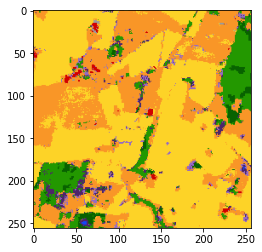

In [18]:
plt.imshow(img)

In [ ]:
im1 = plt.imread("train/lc/T32UMF_20170619T103021_10002_3111.png") 
im1 = np.array(im1*255, dtype=np.uint8)

In [ ]:
plt.imshow(im1)

In [ ]:
a = im1 == img
a[a==False]